In [1]:
# Tool to aid in calculating how the concentration of a secreted factor varies over time and space under 
# diffusion given a SINGLE secretion event. 
# 3D space is assumed, hence 'distance' is distance from point of secretion in 3D. 
# Diffusion coefficients can be specified, as can the quantity secreted. 
# Take note of units. Currently in um, and for diffusion coeffients, um^2/s
#
# This tool can be used to calculate the range of chemotactic signal (or other signalling events), given a particular
# cellular senstivity. 
#
# Mark N. Read, 2018



import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
def heat_eqn_solve(dist, dt, diffusion, quantity_secreted):
    """
    dist = distances in um
    dt = time since secretion event, in seconds
    diffusion = in um^2/s
    quantity_secreted = number of molecules
    """
    dimensionality = 3
    coeff = 1 / ( (4 * np.pi * diffusion * dt) ** (dimensionality/2) )  
    diff = np.exp(-(dist*dist) / (4 * diffusion * dt))
    return quantity_secreted * coeff * diff

In [3]:
def draw_fig(Z, distances, time):
    fig = plt.figure(figsize=(10, 10))
    # Used for graphing, maximum point on graph. 
    extent = [min(distances), max(distances), min(time), max(time)]
    ax = fig.gca()
    im = ax.imshow(Z, extent=extent, origin='lower', aspect='auto')

    Z_sorted = sorted(Z.flatten())[::-1]  # Sort then reverse.

    # Pick m elements evenly spaced from [0, n]. Use as index into array. 
    f = lambda m, n: [i*n//m + n//(2*m) for i in range(m)]
    level_indices = f(8, len(Z_sorted)//3)
    levels = [Z_sorted[i] for i in level_indices][::-1]  # Put into increasing order
    
    print('contour levels = ' + str(levels))
    
    ct = ax.contour(Z, colors='white', extent=extent, origin='lower')#, levels=levels)
    # Recast levels to new class
#     ct.levels = [nf(val) for val in ct.levels]
    plt.clabel(ct, fmt='%.1E', inline=True, fontsize=12)
    fig.colorbar(im)
    ax.set_xlabel('Distance from secretion source (um)')
    ax.set_ylabel('Time (min)')
    fig.tight_layout()
    plt.show()

In [4]:
def process(D, secretion_rate,  # In molecules/min
               max_distance, max_time, debug=False):
    samples = 100  # Resolution along each axis 
    distances = np.linspace(1, max_distance, samples)  # Microns. Distance from secretion point
    times = np.linspace(max_time/samples, max_time, samples)  # Minutes
    times *= 60  # Convert to seconds, match units of diffusion coeff.
    timeslice = times[1] - times[0]
    quantity_secreted = secretion_rate * timeslice  # Both expressed in minutes; quantity in molecules.
    print('{:E} molecules secreted in {:.2f} seconds'.format(quantity_secreted, timeslice))
    
    # First index = time, second = distance. 
    Distances, Times = np.meshgrid(distances, times)  # X and Y locations (distances and times) for plot
    
    Z = np.zeros(Distances.shape)  # Store concentrations herein. 
    # Go through each time in turn, as past times require repeat heat eqn runs. 
    for t_i in list(range(Times.shape[0])):
        dt = Times[t_i, 0]  # How long ago?
        
        if debug:
            print('processing time {:f}'.format(dt))
        
        concentrations_at_time = heat_eqn_solve(Distances[t_i, :], dt, D, quantity_secreted)
        Z[t_i, :] += concentrations_at_time
        
        
#         while (dt > 0):  # Iterate through each time step. 
#             # Solve for all these distances in one go.
#             concentrations_at_time = heat_eqn_solve(Distances[t_i, :], dt, D, quantity_secreted)            
#             Z[t_i, :] += concentrations_at_time
#             if debug:    
#                 print('  processing iteration {:f}'.format(dt))
#                 print('  ' + str(Distances[t_i, :]))
#                 print('  ' + str(concentrations_at_time))
#                 print('  ')
#                 print('  ' + str(Z))
    
#             dt -= timeslice
    if debug:
        print(Distances)
        print(Times)
        print(Z)
    draw_fig(Z, distances, times/60.)  # Convert times back to minutes

1.199880E+06 molecules secreted in 180.00 seconds
contour levels = [1.5302075751879457e-05, 1.8822388993163124e-05, 2.3852339378856877e-05, 3.149563446954853e-05, 4.4420005814898223e-05, 7.083598966082918e-05, 0.00013713574911502422, 0.0004025923945844887]


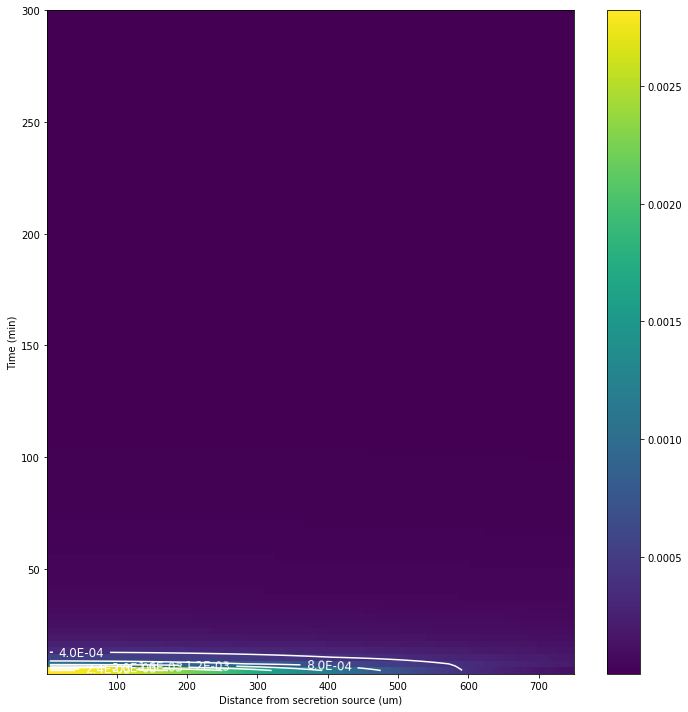

In [6]:
# Note that diffusion coefficients typical have units cm^2/s. We need it to be in um^2/s. To convert from the 
# former to the latter, multiply by 1e8. 
#
# For proteins of 10-50kDa, diffusion coefficient ~ 5e1 um^2/s. 
# For smaller molecules (e.g. LTB4), 
prot_D = 2.5e2  # um^2/s, diffusion coefficient
secretion_rate = 6666  # molecules per minute 
process(prot_D, secretion_rate=secretion_rate, max_distance=750, max_time=300)

In [128]:
np.arange(10,1, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2])